### Download HRRR Data using Herbie

Notebook contents 

https://herbie.readthedocs.io/en/2024.3.0/user_guide/install.html
* attempting to use Herbie to download HRRR data 

created by Cassie Lumbrazo\
last updated: Jan 2025\
run location: UAS linux\
python environment: **herbie**\
*created a new environment for herbie data downloader...*

In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import scipy

In [2]:
pwd

'/home/cassie/python/repos/juneau_data_analysis'

In [4]:
from herbie import Herbie
# from toolbox import EasyMap, pc
# from paint.standard2 import cm_tmp

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

Download the HRRR ak dataset for a specific date to test the download.

In [5]:
H = Herbie(
    "2023-11-01",
    model="hrrrak",
    product="sfc",
    fxx=6,
)

✅ Found ┊ model=hrrrak ┊ product=sfc ┊ 2023-Nov-01 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


In [6]:
# show additional products 
H.PRODUCTS

{'prs': '3D pressure level fields; 3-km resolution',
 'sfc': '2D surface level fields; 3-km resolution',
 'nat': 'Native level fields; 3-km resolution',
 'subh': 'Subhourly grids; 3-km resolution'}

In [7]:
H.DESCRIPTION

'High-Resolution Rapid Refresh - Alaska'

In [9]:
H.date

Timestamp('2023-11-01 00:00:00')

In [10]:
H.DETAILS

{'nomads product description': 'https://www.nco.ncep.noaa.gov/pmb/products/hrrr'}

In [17]:
H.product_description

'2D surface level fields; 3-km resolution'

In [11]:
ds = H.xarray("TMP:2 m")
ds

👨🏻‍🏭 Created directory: [/home/cassie/data/hrrrak/20231101]


<xarray.Dataset> Size: 24MB
Dimensions:              (y: 919, x: 1299)
Coordinates:
    time                 datetime64[ns] 8B 2023-11-01
    step                 timedelta64[ns] 8B 06:00:00
    heightAboveGround    float64 8B 2.0
    latitude             (y, x) float64 10MB 41.61 41.63 41.64 ... 76.35 76.34
    longitude            (y, x) float64 10MB 185.1 185.1 185.2 ... 244.1 244.2
    valid_time           datetime64[ns] 8B 2023-11-01T06:00:00
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 5MB 284.2 284.2 284.2 ... 258.6 258.5
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrrak
    product:                 sfc
    description:             High-Resolution Rapid Refresh - Alaska
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              /home/cassie/data/hrrrak/20231101/subset_61b29dd...
    search:                  TMP:2 m

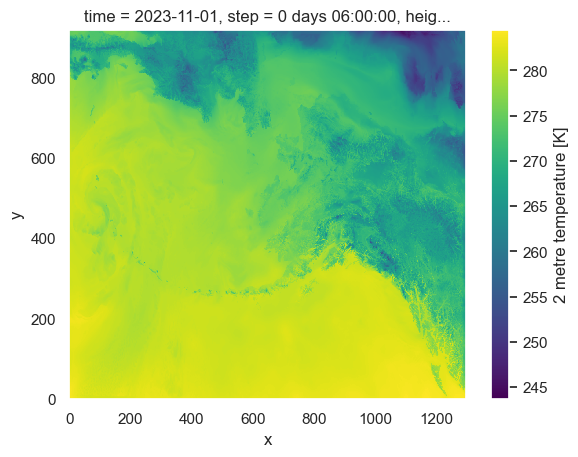

In [16]:
ds['t2m'].plot()

In [19]:
ds['t2m'].attrs

{'GRIB_paramId': 167,
 'GRIB_dataType': 'fc',
 'GRIB_numberOfPoints': 1193781,
 'GRIB_typeOfLevel': 'heightAboveGround',
 'GRIB_stepUnits': 1,
 'GRIB_stepType': 'instant',
 'GRIB_gridType': 'polar_stereographic',
 'GRIB_NV': 0,
 'GRIB_cfName': 'air_temperature',
 'GRIB_cfVarName': 't2m',
 'GRIB_gridDefinitionDescription': 'Polar stereographic can be south or north',
 'GRIB_missingValue': 3.4028234663852886e+38,
 'GRIB_name': '2 metre temperature',
 'GRIB_parameterName': 'Temperature',
 'GRIB_parameterUnits': 'K',
 'GRIB_shortName': '2t',
 'GRIB_stepRange': '6',
 'GRIB_units': 'K',
 'long_name': '2 metre temperature',
 'units': 'K',
 'standard_name': 'air_temperature',
 'grid_mapping': 'gribfile_projection'}

The plotting code provided...

In [13]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 8]).STATES().ax

p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.t2m,
    transform=pc,
    **cm_tmp(units="K").cmap_kwargs,
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.05,
    **cm_tmp(units="K").cbar_kwargs,
)

ax.set_title(ds.t2m.GRIB_name, loc="right")
ax.set_title(f"{ds.model.upper()}: {H.product_description}", loc="left")

NameError: name 'toolbox' is not defined